In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [4]:
import hist
from hist import Hist

In [30]:
h1 = Hist(
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label="PF Electron pt [GeV]", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].mass)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].pt)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label="PF Electron pt [GeV]", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].mass)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].pt)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label="PF Electron pt [GeV]", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].mass)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].pt)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label="PF Electron pt [GeV]", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].mass)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].pt)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label="PF Electron pt [GeV]", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].mass)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].pt)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='PF Electron pt [GeV]'),
  storage=Double()) # Sum: 14518.0

  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='PF Electron pt [GeV]'),
  storage=Double()) # Sum: 121153.0
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='PF Electron pt [GeV]'),
  storage=Double()) # Sum: 44302.0
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='PF Electron pt [GeV]'),
  storage=Double()) # Sum: 29595.0
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='PF Electron pt [GeV]'),
  storage=Double()) # Sum: 18315.0
  Regular(50, -0.05, 0.05, underflow=False, ove

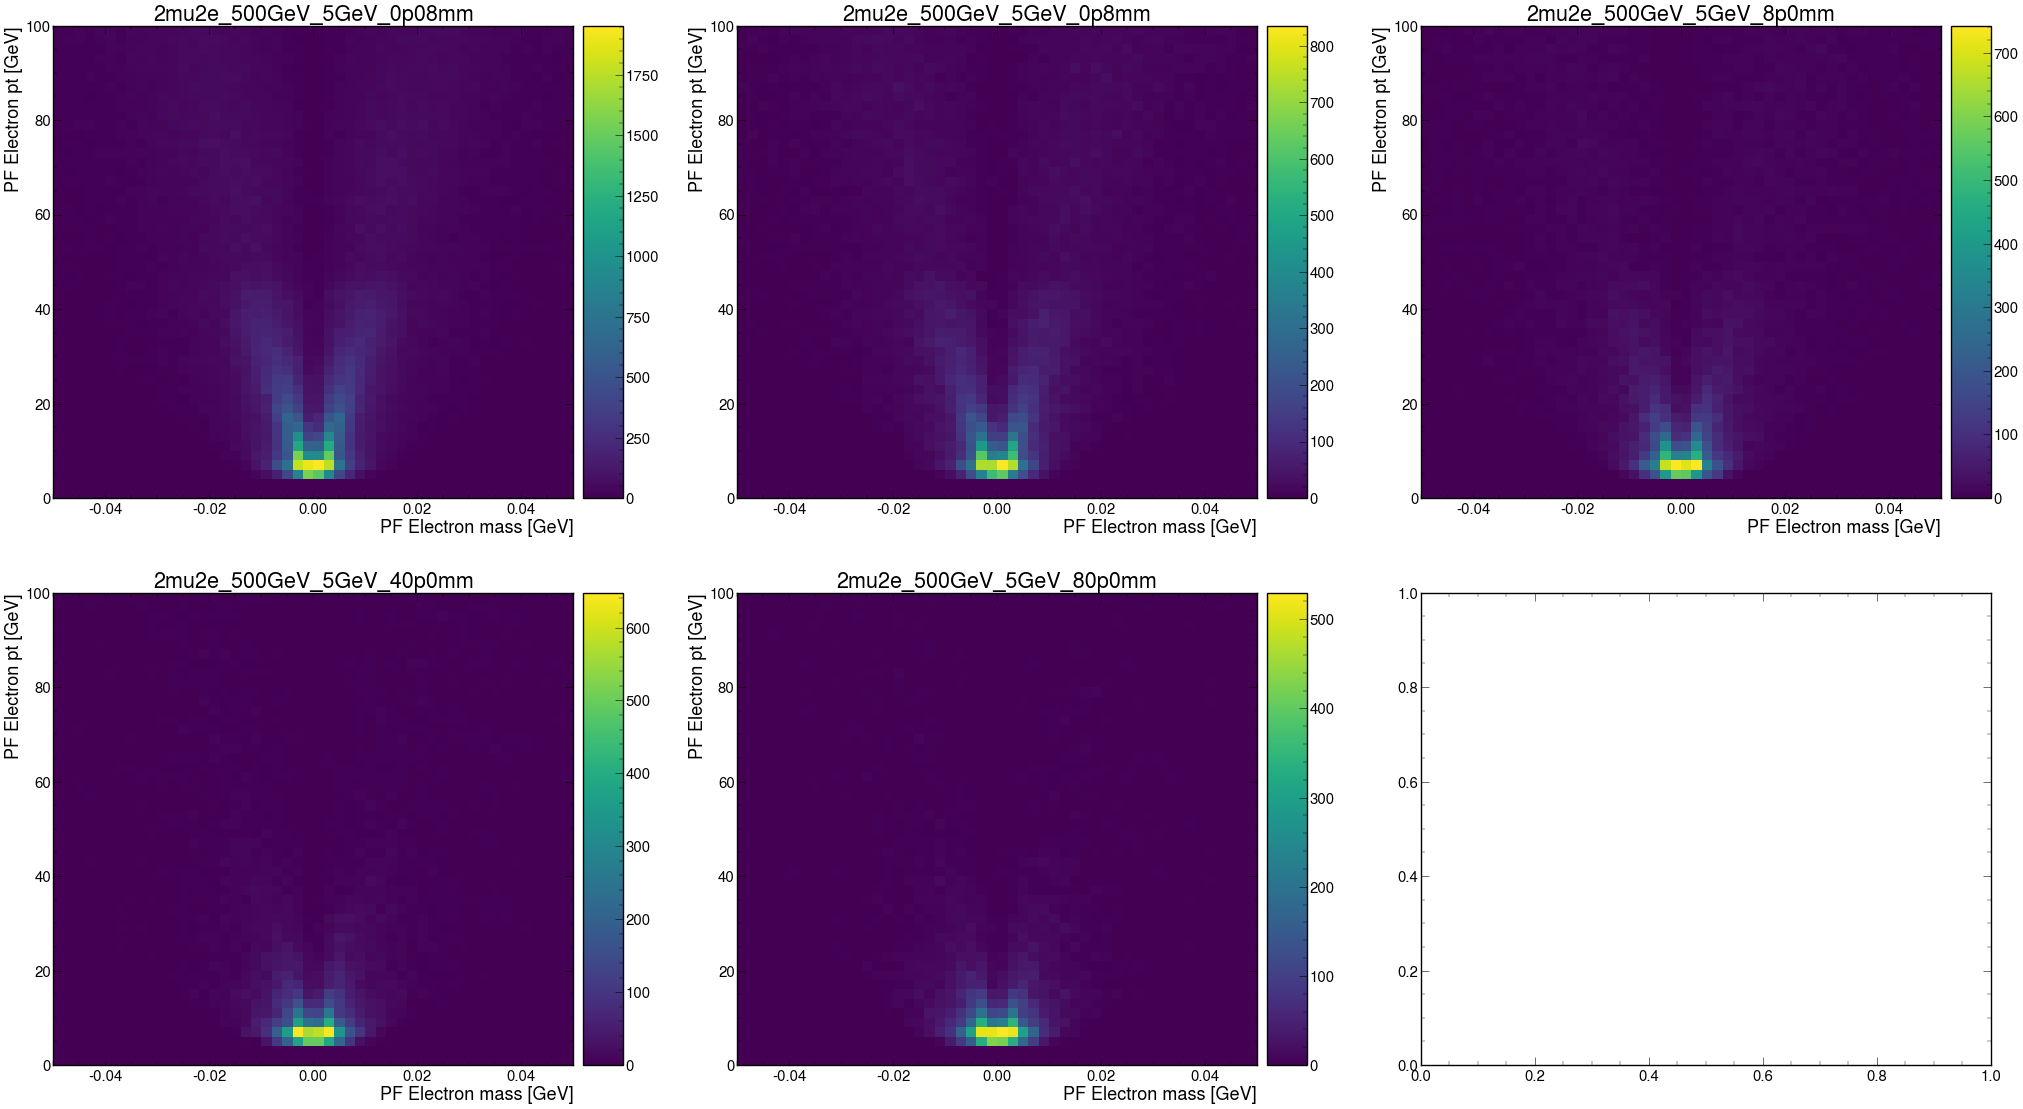

<Figure size 500x500 with 0 Axes>

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/pt_mass_2mu2e.png", bbox_inches="tight")

In [7]:
h1 = Hist(
    hist.axis.Regular(50, -3.2, 3.2, name="phi", label="PF Electron phi", flow=False),
    hist.axis.Regular(50, -2.5, 2.5, name="eta", label="PF Electron eta", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].phi)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].eta)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, -3.2, 3.2, name="phi", label="PF Electron phi", flow=False),
    hist.axis.Regular(50, -2.5, 2.5, name="eta", label="PF Electron eta", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].phi)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].eta)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, -3.2, 3.2, name="phi", label="PF Electron phi", flow=False),
    hist.axis.Regular(50, -2.5, 2.5, name="eta", label="PF Electron eta", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].phi)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].eta)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, -3.2, 3.2, name="phi", label="PF Electron phi", flow=False),
    hist.axis.Regular(50, -2.5, 2.5, name="eta", label="PF Electron eta", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].phi)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].eta)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, -3.2, 3.2, name="phi", label="PF Electron phi", flow=False),
    hist.axis.Regular(50, -2.5, 2.5, name="eta", label="PF Electron eta", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].phi)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].eta)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron phi'),
  Regular(50, -2.5, 2.5, underflow=False, overflow=False, name='eta', label='PF Electron eta'),
  storage=Double()) # Sum: 20611.0

  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron phi'),
  Regular(50, -2.5, 2.5, underflow=False, overflow=False, name='eta', label='PF Electron eta'),
  storage=Double()) # Sum: 287921.0
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron phi'),
  Regular(50, -2.5, 2.5, underflow=False, overflow=False, name='eta', label='PF Electron eta'),
  storage=Double()) # Sum: 113477.0
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron phi'),
  Regular(50, -2.5, 2.5, underflow=False, overflow=False, name='eta', label='PF Electron eta'),
  storage=Double()) # Sum: 68141.0
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron phi'),
  Regular(50, -2.5, 2.5, underflow=False, overflow=False, name='eta', label='PF Electron eta'),
  storage=Double()) # Sum: 29795.0
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='phi', label='PF Electron p

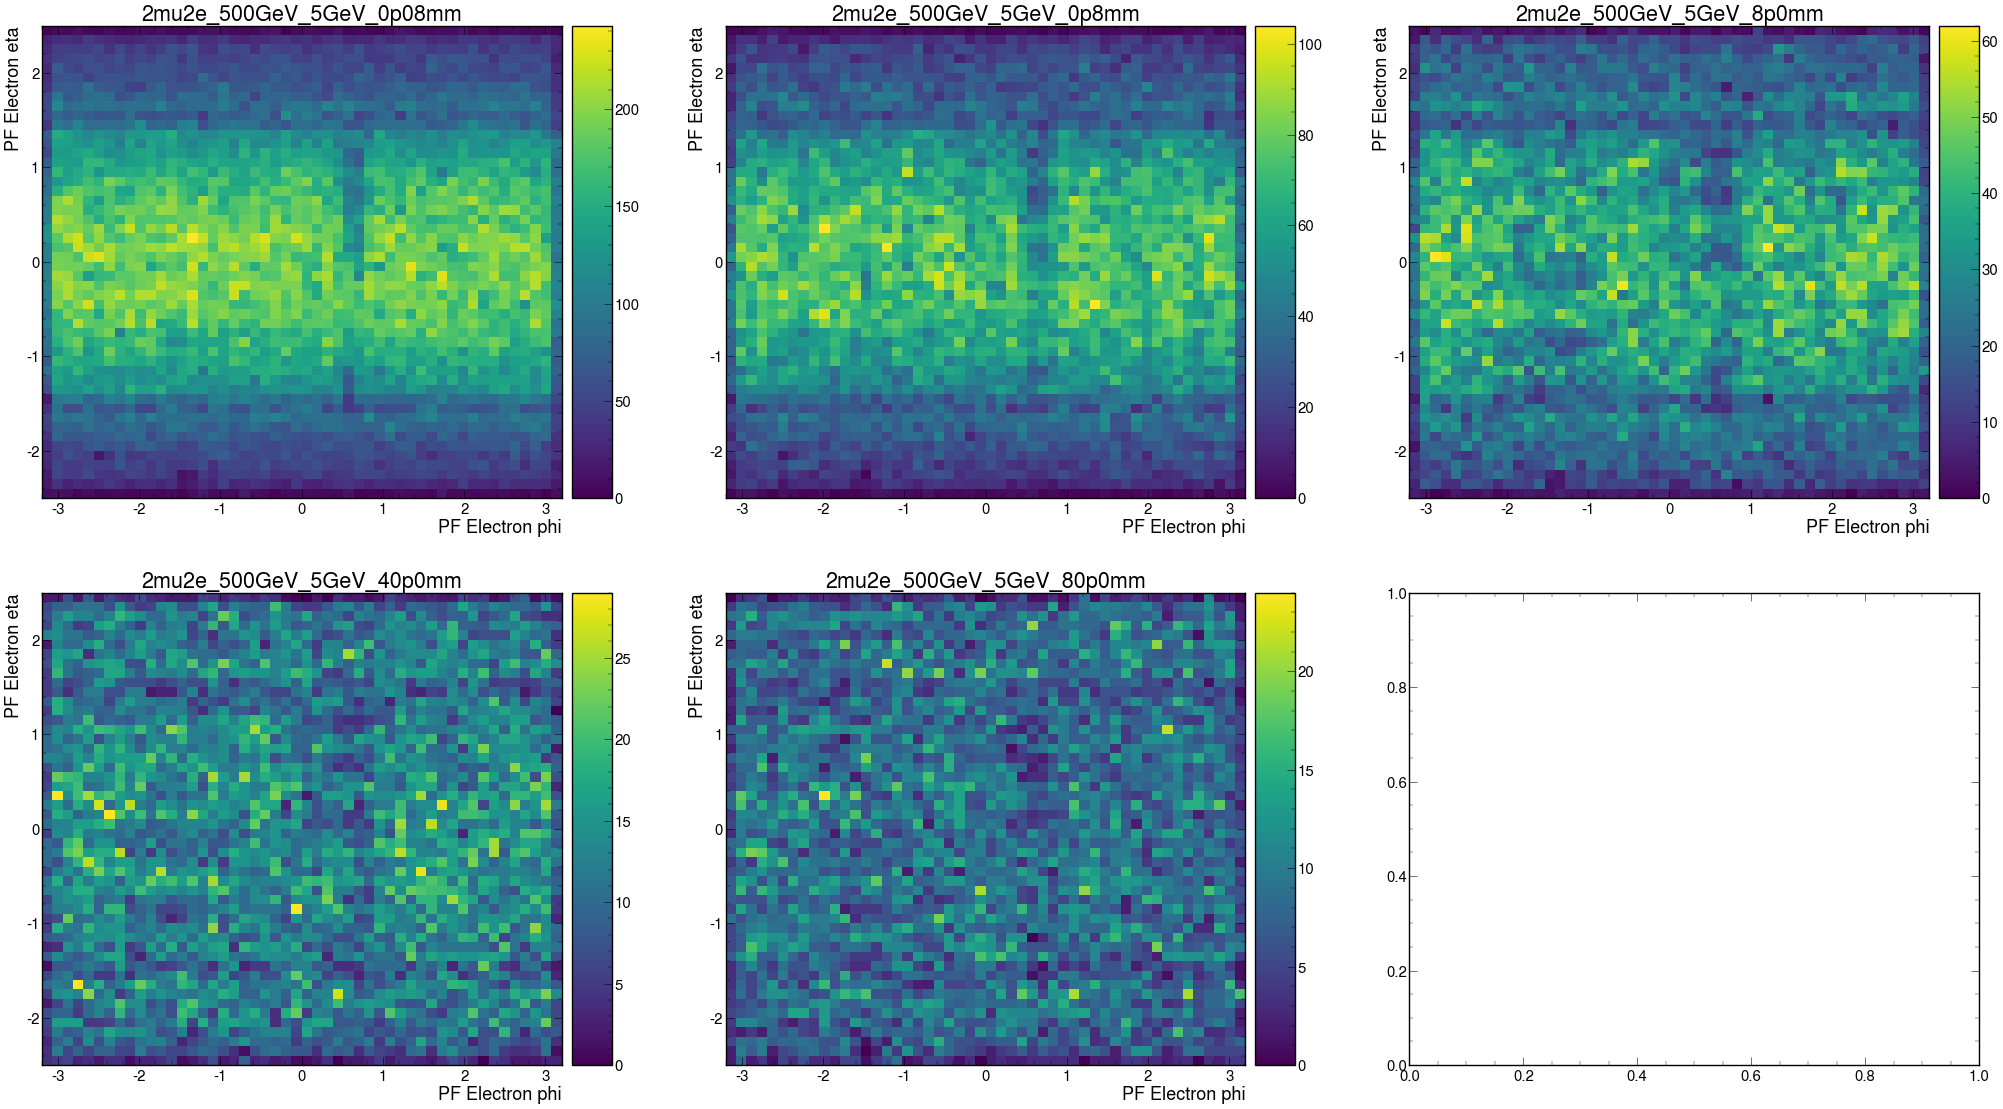

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()

In [14]:
h1 = Hist(
    hist.axis.Regular(50, 0, 23, name="genPartFlav", label="PF Electron genPartFlav", flow=False),
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].genPartFlav)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].mass)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 23, name="genPartFlav", label="PF Electron genPartFlav", flow=False),
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].genPartFlav)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].mass)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 23, name="genPartFlav", label="PF Electron genPartFlav", flow=False),
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].genPartFlav)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].mass)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 23, name="genPartFlav", label="PF Electron genPartFlav", flow=False),
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].genPartFlav)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].mass)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 23, name="genPartFlav", label="PF Electron genPartFlav", flow=False),
    hist.axis.Regular(50, -0.05, 0.05, name="mass", label="PF Electron mass [GeV]", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].genPartFlav)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].mass)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 23, underflow=False, overflow=False, name='genPartFlav', label='PF Electron genPartFlav'),
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  storage=Double()) # Sum: 17044.0

  Regular(50, 0, 23, underflow=False, overflow=False, name='genPartFlav', label='PF Electron genPartFlav'),
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  storage=Double()) # Sum: 200070.0
  Regular(50, 0, 23, underflow=False, overflow=False, name='genPartFlav', label='PF Electron genPartFlav'),
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  storage=Double()) # Sum: 76243.0
  Regular(50, 0, 23, underflow=False, overflow=False, name='genPartFlav', label='PF Electron genPartFlav'),
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  storage=Double()) # Sum: 46450.0
  Regular(50, 0, 23, underflow=False, overflow=False, name='genPartFlav', label='PF Electron genPartFlav'),
  Regular(50, -0.05, 0.05, underflow=False, overflow=False, name='mass', label='PF Electron mass [GeV]'),
  storage=Double()) # Sum: 23082.0
  R

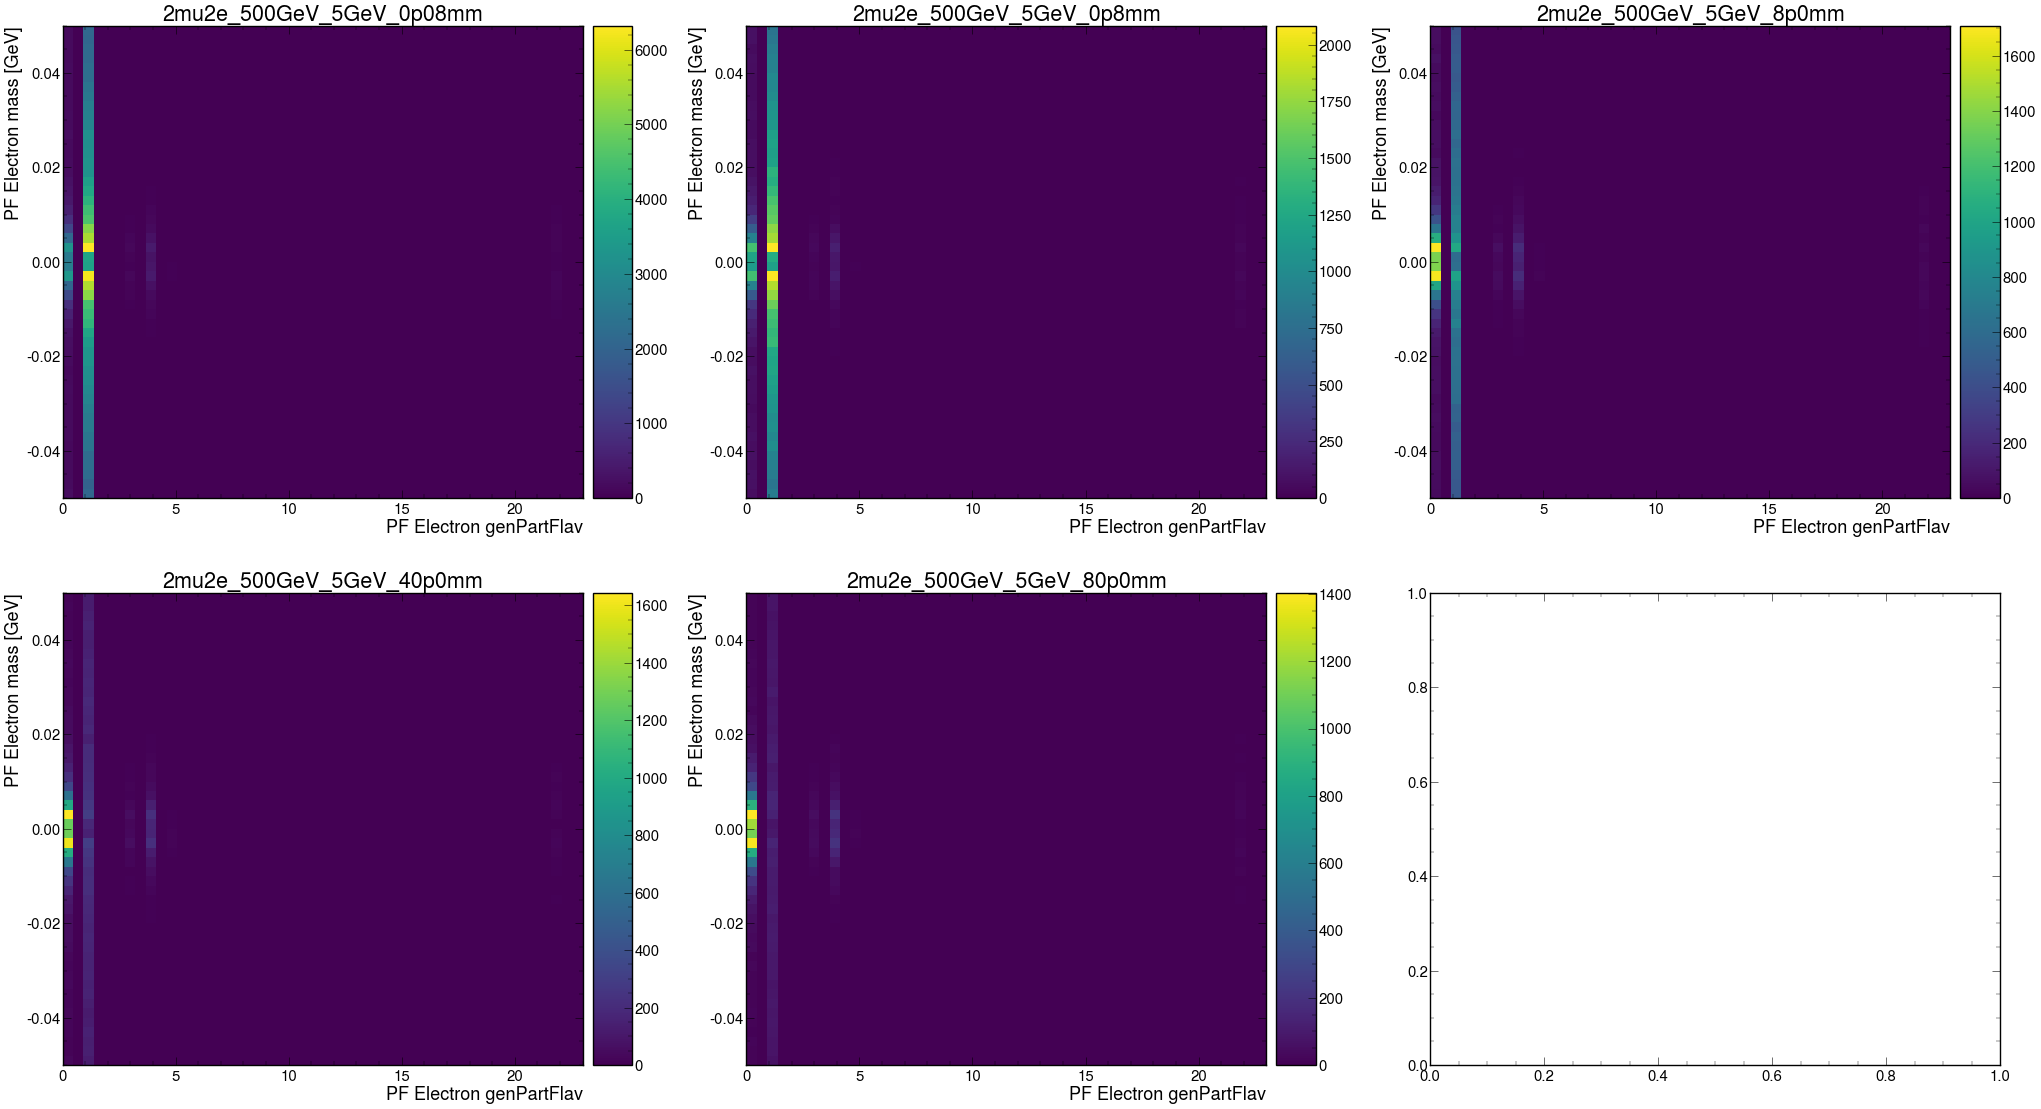

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()